In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('../../02_dataset/merged_df.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.sample(15)

ISO3_code  Year  pt_gdp_agriculture   oil_rent  democracy_polity  \
7898       ESP  1989            4.379625   0.020502         10.000000   
8657       TUN  2005            9.169831   3.792492         -4.000000   
4230       ITA  2018            1.857556   0.066029         10.000000   
5783       MAR  2019           10.842401   0.001372         -6.232955   
5727       MAR  1963           23.445040   0.000840         -3.000000   
2037       HRV  2006            3.977648   0.419644          9.000000   
3376       GRC  1972            6.869984   0.000000         -7.000000   
5224       MWI  1970           37.248077   0.000000         -9.000000   
4449       KAZ  1967           23.341625   2.252187         -7.000000   
8793       TKM  2010           11.340543  10.172802         -9.000000   
4351       JPN  2008            1.054102   0.002542         10.000000   
1019       BWA  1977           22.603550   0.000000          6.000000   
6435       OMN  2000            1.965229  44.475780         -9.000000   
848        BEN  1998           36.576650   0.101033          6.000000   
2957       FJI  1999           16.404919   0.000000          8.000000   

               gdp       country  ethnic_fractionation_index  mean_temp  \
7898  7.181171e+11         Spain                       0.583       14.4   
8657  3.386298e+10       Tunisia                       0.039       19.8   
4230  1.913894e+12         Italy                       0.110       15.5   
5783  1.236520e+11       Morocco                       0.566       18.1   
5727  1.151853e+10       Morocco                       0.461       16.9   
2037  5.218681e+10       Croatia                       0.213       11.9   
3376  1.114201e+11        Greece                       0.053       15.0   
5224  1.492568e+09        Malawi                       0.789       22.4   
4449  5.853202e+10    Kazakhstan                       0.676        6.5   
8793  2.170178e+10  Turkmenistan                       0.280       17.2   
4351  4.297493e+12         Japan                       0.017       12.3   
1019  1.307713e+09      Botswana                       0.485       21.5   
6435  4.537273e+10          Oman                       0.483       27.7   
848   5.577293e+09         Benin                       0.779       28.4   
2957  3.388349e+09          Fiji                       0.549       25.0   

      yearly_avg_rainfall  ...  gdp_pchange  unemp_rate  unemp_rate_pchange  \
7898           630.039075  ...     4.827029       8.232            0.000000   
8657           261.186111  ...     3.486548      12.872           -9.543219   
4230           649.114286  ...     0.826645      10.610           -5.360806   
5783           165.285285  ...     2.890979       9.210           -0.775695   
5727           348.815315  ...     0.000000       8.910            0.000000   
2037           762.310000  ...     5.081467      11.130          -11.652643   
3376           591.369253  ...    10.160155       7.572            0.000000   
5224           953.063063  ...     0.479296       4.690            0.000000   
4449           203.744016  ...     0.000000       0.900            0.000000   
8793           100.924167  ...     9.200010       4.000            0.000000   
4351          1202.421941  ...    -1.224288       4.002            2.932099   
1019           474.497630  ...    12.012044      13.820            0.000000   
6435            26.064465  ...     6.192405       4.396           -0.475436   
848            905.360417  ...     3.961010       1.051           -4.627949   
2957          2629.404762  ...     8.800002       4.709           -1.029844   

          gini  gini_pchange   population participants number_events  \
7898  0.346336      0.000000          NaN          NaN           NaN   
8657  0.377334     -1.375361   10255472.0          0.0           0.0   
4230  0.352173     -1.962246   60421760.0      12750.0           9.0   
5783  0.393222      0.000000   36210898.0       6800.0           7.0   
5727  0.39

In [76]:
df.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'mean_temp_t', 'mean_temp_t_1', 'gdp_percap',
       'gdp_percap_pchange', 'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange', 'population', 'participants', 'number_events',
       'yprotest', 'protest_fraction'],
      dtype='object')

In [77]:
# find sample countries, those with high pt_gdp_agriculture, and with protest data
#further subset to only include data from 1990, drop ones without ISO code, as we have no features explaining the protest in these countries
sub_df = df[(df['Year']>1989) & df['Year']<2021]
sub_df.dropna(subset='yprotest', inplace=True)
sub_df.dropna(subset='ISO3_code', inplace=True)

sub_df.country.nunique()

118

In [78]:
sub_df.drop_duplicates(inplace=True)

In [79]:
sub_df.columns

Index(['ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'mean_temp_t', 'mean_temp_t_1', 'gdp_percap',
       'gdp_percap_pchange', 'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange', 'population', 'participants', 'number_events',
       'yprotest', 'protest_fraction'],
      dtype='object')

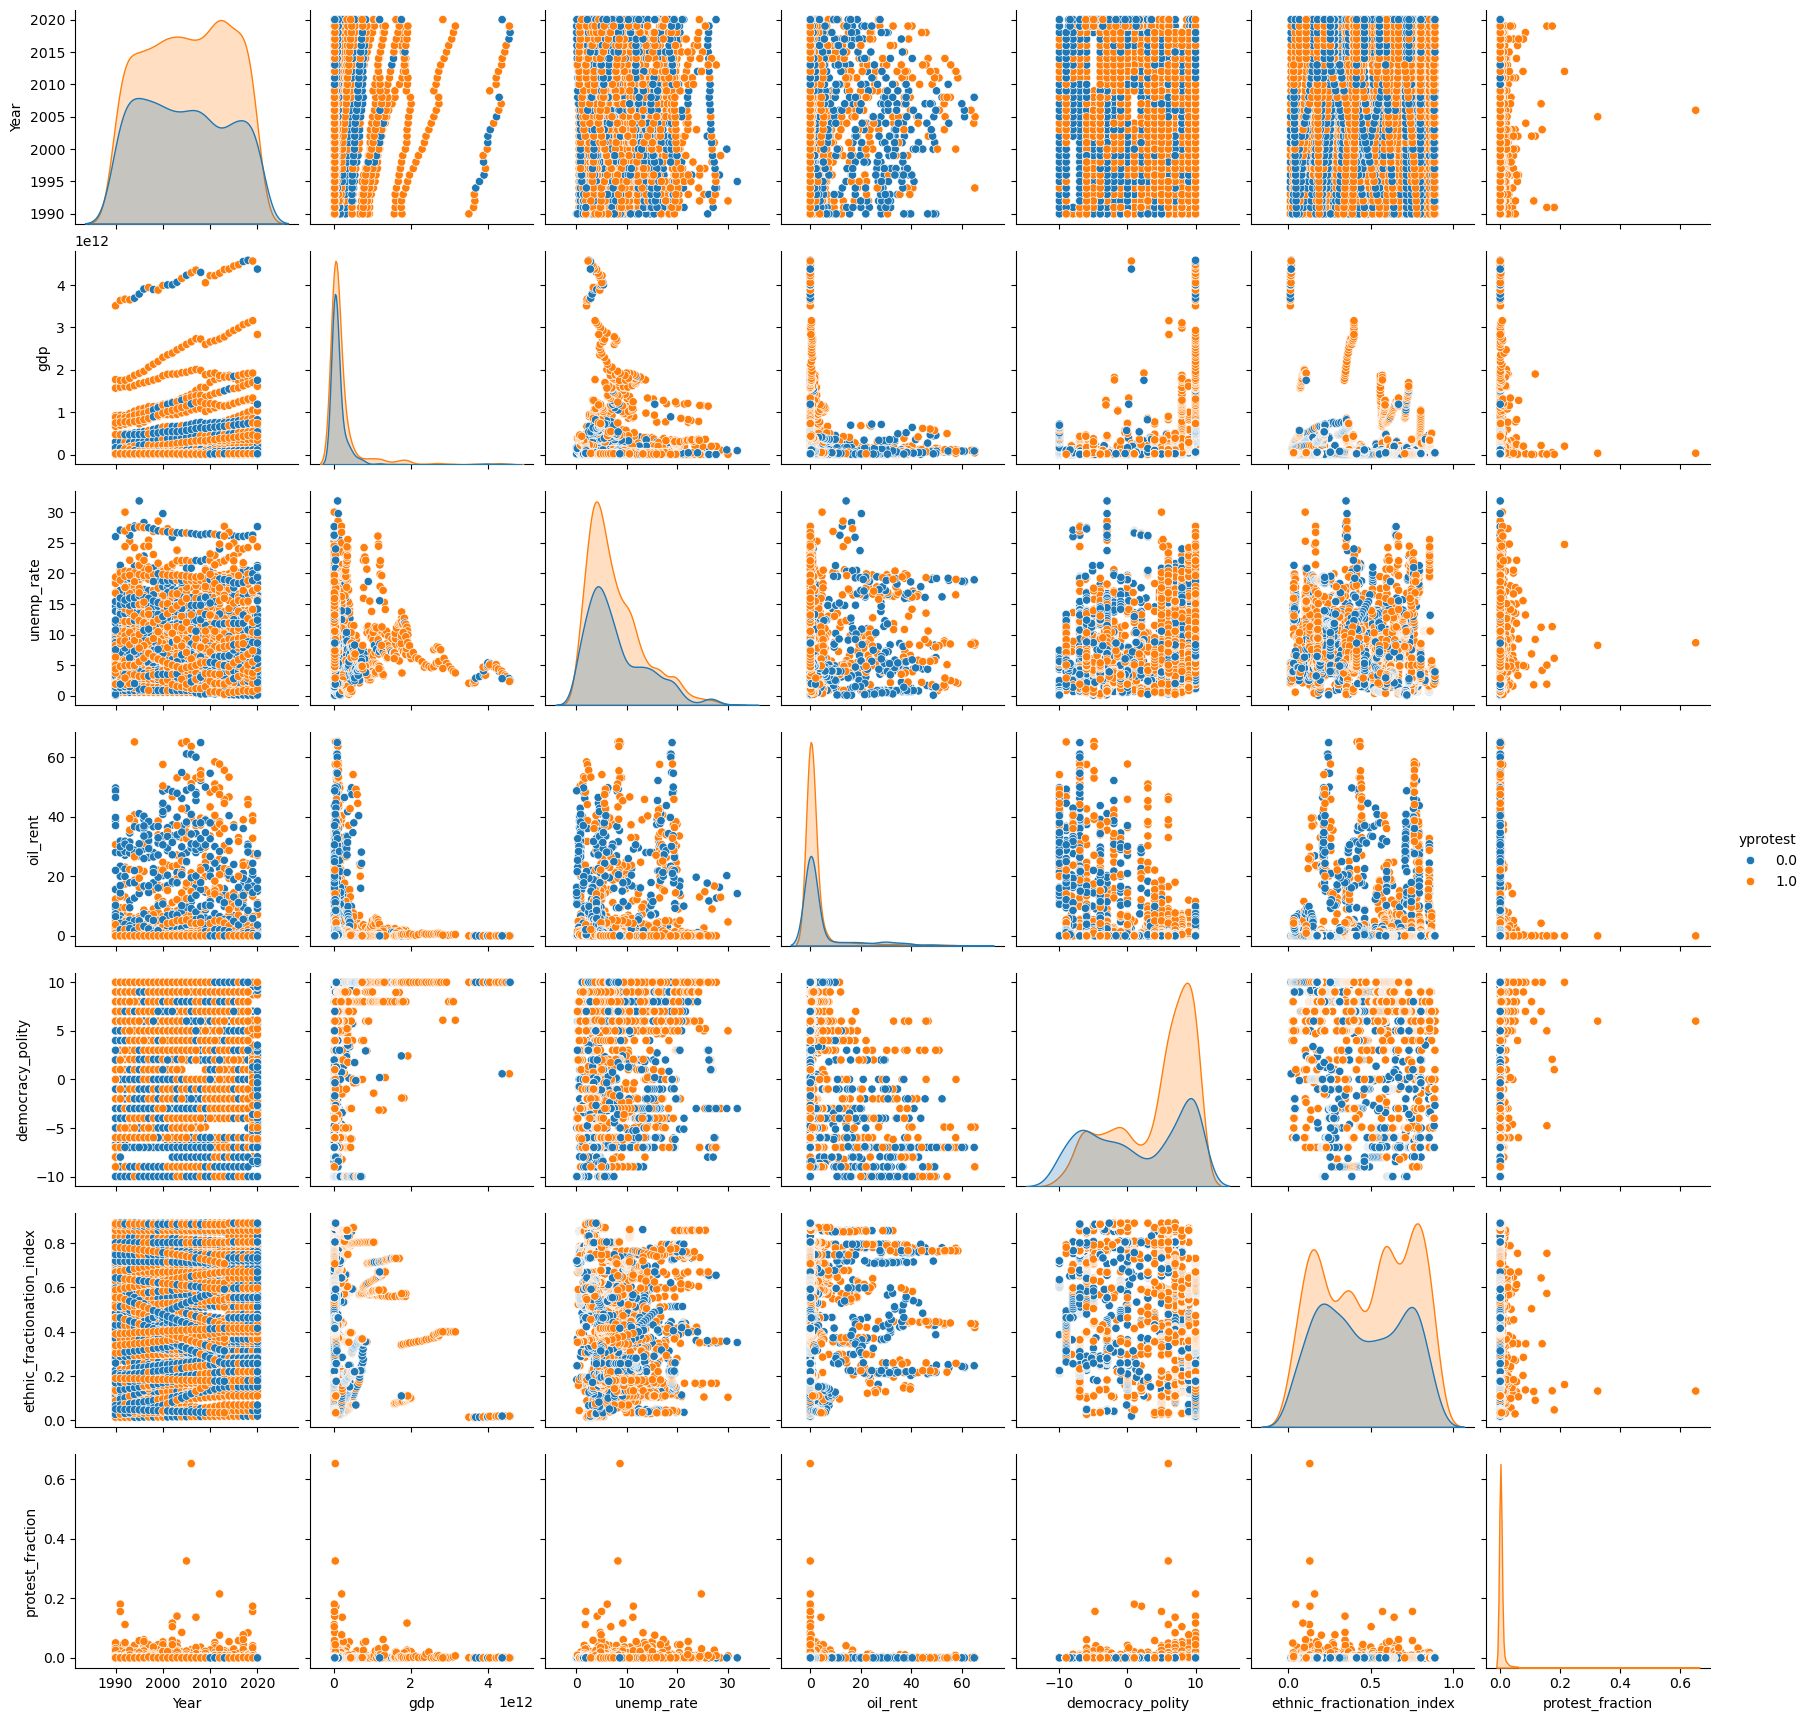

In [80]:
features = ['Year', 'gdp', 'unemp_rate', 'oil_rent', 'democracy_polity', 'ethnic_fractionation_index', 'protest_fraction']
sns.pairplot(sub_df, x_vars=features, y_vars=features, hue='yprotest')

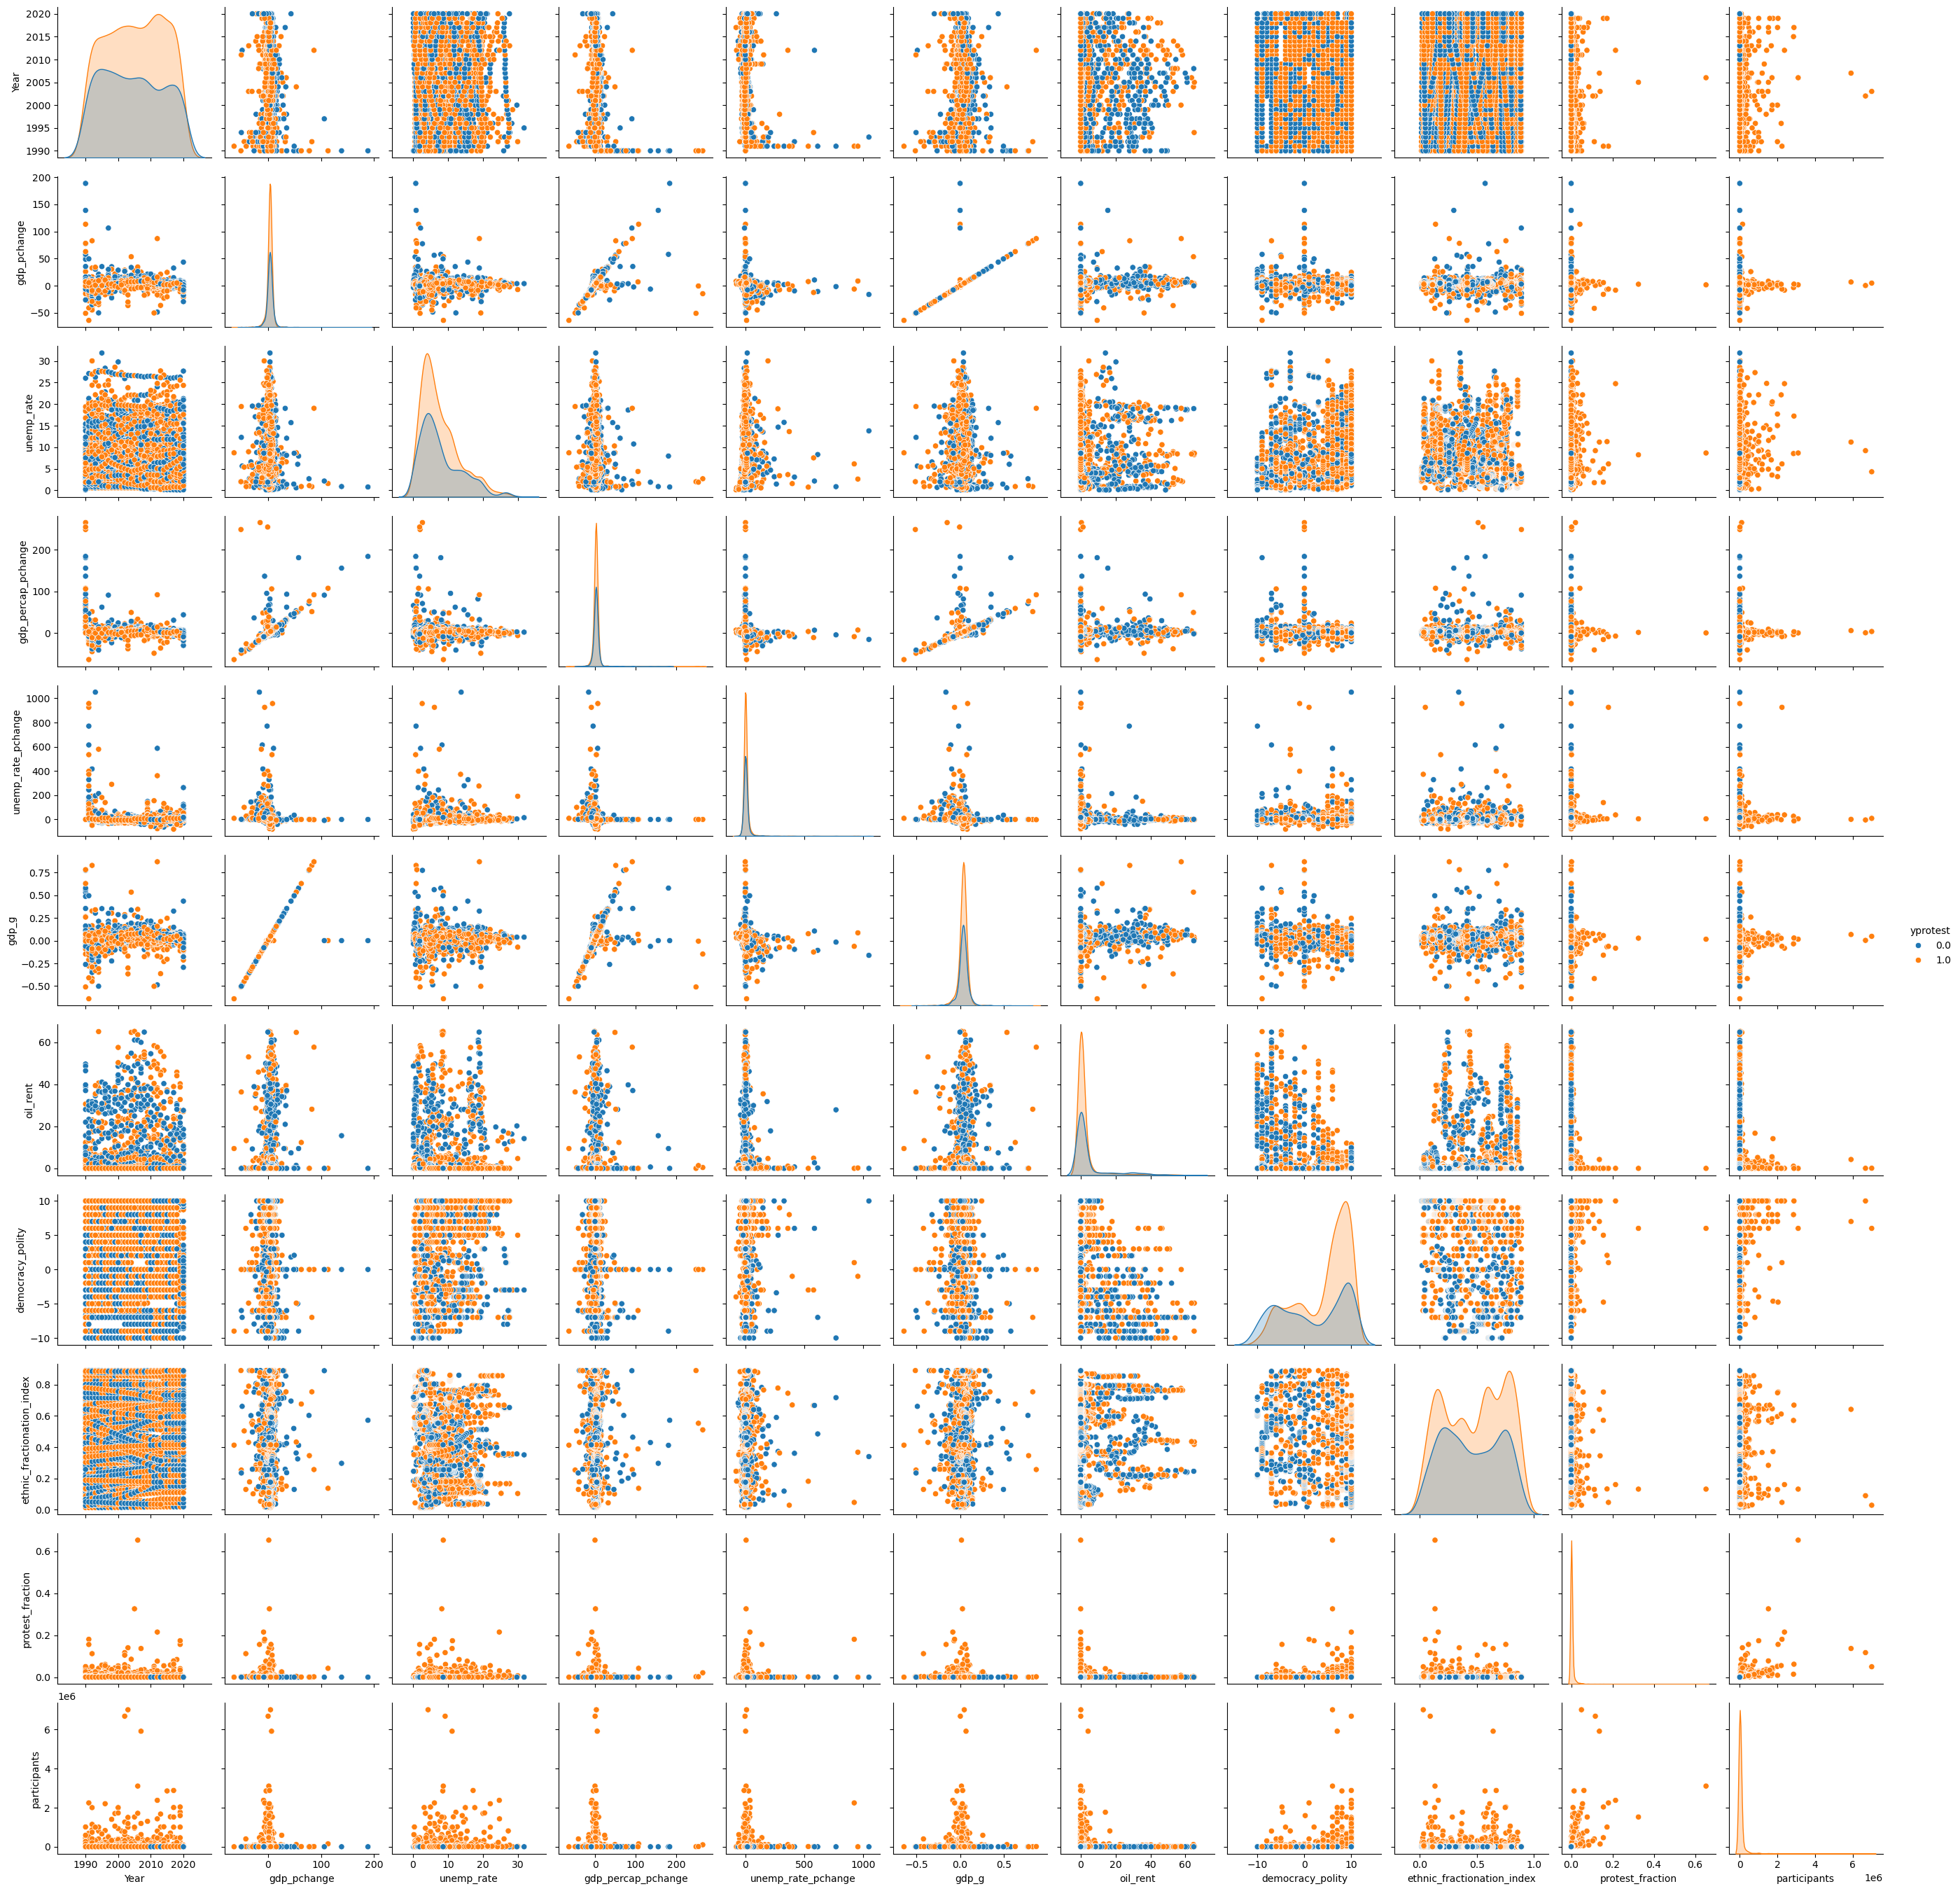

In [81]:
chg_features = ['Year', 'gdp_pchange', 'unemp_rate', 'gdp_percap_pchange', 'unemp_rate_pchange', 'gdp_g', 'oil_rent', 'democracy_polity', 'ethnic_fractionation_index', 'protest_fraction', 'participants']
sns.pairplot(sub_df, x_vars=chg_features, y_vars= chg_features, hue='yprotest')

# only keep one of the gdp_pchange, gdp_percap_pchange, gdp_g-- chose gdp_g as this is the normalized version
chg_features = ['Year', 'gdp_g', 'unemp_rate_pchange', 'oil_rent', 'democracy_polity', 'ethnic_fractionation_index', 'protest_fraction', 'participants']



In [82]:
sub_df['protest_fraction'].describe()

count    3666.000000
mean        0.002349
std         0.015642
min         0.000000
25%         0.000000
50%         0.000020
75%         0.000461
max         0.652707
Name: protest_fraction, dtype: float64

# Protest as Linear Outcome

In [83]:
#import regression, knn, PCA for feature selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [84]:
sub_df.isna().any()

ISO3_code                       False
Year                            False
pt_gdp_agriculture              False
oil_rent                        False
democracy_polity                False
gdp                             False
country                         False
ethnic_fractionation_index      False
mean_temp                       False
yearly_avg_rainfall             False
rainfall_var_t                  False
rainfall_var_t_1                False
gdp_g                           False
rainfall_diff_from_mean_norm    False
n_below_rainfall                False
oil_prod                        False
agricultural                    False
low_oil_high_agr                False
cum_rainfall_diff               False
mean_temp_t                     False
mean_temp_t_1                   False
gdp_percap                       True
gdp_percap_pchange               True
gdp_pchange                     False
unemp_rate                      False
unemp_rate_pchange              False
gini        

In [ ]:
# use sub_df

reg_feats= ['Year', 'gdp', 'gdp_g' , 
            'unemp_rate', 'unemp_rate_pchange',  
            'oil_rent', 'democracy_polity', 'ethnic_fractionation_index']

# take 0.8 for train
train, test = train_test_split(sub_df, test_size=0.2)

lr = LinearRegression()
lr.fit(train[reg_feats], train['protest_fraction'])
lr.coef_
lr.score(train[reg_feats], train['protest_fraction'])

0.01578019631996741

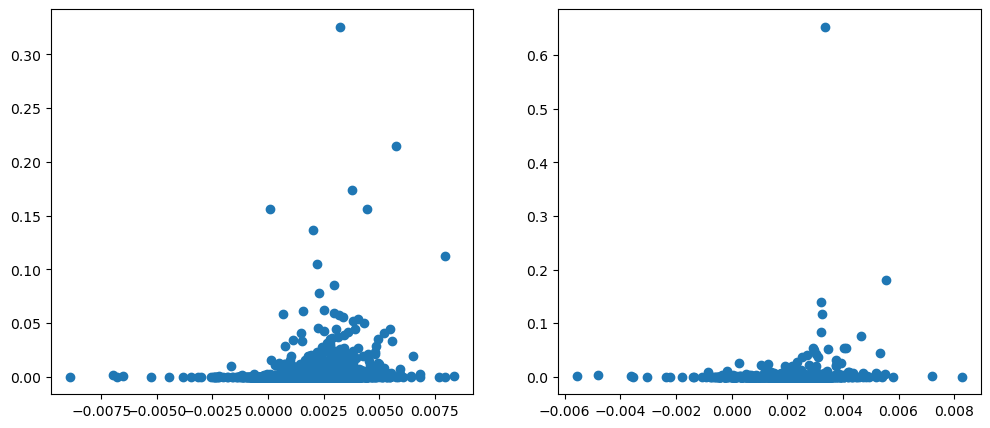

In [86]:
# diagnostic plots for regression

plt.figure('diagnostic mlr plot', figsize=(12,5))

plt.subplot(121)
preds = lr.predict(train[reg_feats])
y = train['protest_fraction']
plt.scatter(preds, y)

plt.subplot(122)
preds = lr.predict(test[reg_feats])
y = test['protest_fraction']
plt.scatter(preds, y)

plt.show()

### cross validation (regression, regularization, pca, and knn)

In [87]:
#instantiate models and pipes
mlr = LinearRegression()
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
lasso_pipe = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
pca_pipe = Pipeline([("scale", StandardScaler()), ("pca", PCA(n_components=3)), ('reg', LinearRegression())])
knn = KNeighborsRegressor(10)

kfold = KFold(5)

rmses = np.zeros((5, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(train):
     ## cv training set
    df_tt = train.iloc[train_index]
    ## cv holdout set
    df_ho = train.iloc[test_index]
    

    mlr.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[0,i] = root_mean_squared_error(df_ho['protest_fraction'], mlr.predict(df_ho[reg_feats]))
    
    ridge_pipe.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[1,i] = root_mean_squared_error(df_ho['protest_fraction'], ridge_pipe.predict(df_ho[reg_feats]))

    lasso_pipe.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[2,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[reg_feats]))
    
    pca_pipe.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[3,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[reg_feats]))
    
    knn.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[4,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[reg_feats]))

    i = i + 1

rmses.mean(axis = 1), rmses.std(axis = 1)


(array([0.01082311, 0.01082309, 0.01088646, 0.01088646, 0.01088646]),
 array([0.00261548, 0.0026155 , 0.00264227, 0.00264227, 0.00264227]))

In [88]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
coefs = np.zeros((len(alphas), len(reg_feats)))
for i,alpha in enumerate(alphas):
    # Make a pipeline where you first scale and then lasso.
    # Use max_iter=100000 in your Lasso to avoid some convergence issues.
    lasso_pipe = Pipeline([('scale', StandardScaler()),('lasso', Lasso(alpha = alpha, max_iter=100000))])

    # Fit it to data
    lasso_pipe.fit(train[reg_feats], train['protest_fraction'])

    # Store the coefficients in the ith row of coefs 
    coefs[i,:] = lasso_pipe['lasso'].coef_

pd.DataFrame(coefs, columns=reg_feats)

Year       gdp     gdp_g  unemp_rate  unemp_rate_pchange  oil_rent  \
0 -0.000084 -0.000239 -0.000774    0.000311            0.000080 -0.000062   
1 -0.000010 -0.000119 -0.000702    0.000246            0.000015 -0.000008   
2 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
3 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
4 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
5 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
6 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
7 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   
8 -0.000000  0.000000 -0.000000    0.000000            0.000000 -0.000000   

   democracy_polity  ethnic_fractionation_index  
0          0.000817                    -0.00045  
1          0.000738                    -0.00038  
2          0.000000                    -0.00000  
3          0.000000                    -0.00000  
4          0.000000                    -0.00000  
5          0.000000                    -0.00000  
6          0.000000                    -0.00000  
7          0.000000                    -0.00000  
8          0.000000                    -0.00000

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv.fit(train[reg_feats], train['protest_fraction'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [90]:
print(grid_cv.best_params_, grid_cv.best_score_)

{'max_depth': 2, 'n_estimators': 100} -0.010825786971456064


In [91]:
feature_importance_df = pd.DataFrame({
    'Feature': reg_feats,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                      Feature  Importance
0                       gdp_g    0.391874
1                  unemp_rate    0.306447
2            democracy_polity    0.114718
3          unemp_rate_pchange    0.096698
4  ethnic_fractionation_index    0.065670
5                    oil_rent    0.011857
6                         gdp    0.009980
7                        Year    0.002756


# Classification models for categorical protest outcome

### hyperparameter threshold for protest fraction?


In [94]:
# create boolean protest variables by comparing it different quantile levels. If it's higher than the threshold, code as 1. 0 otherwise.
levels = ['l', 'm', 'h']
quantile = [.3, .5, .7]

lev_q = dict(zip(levels, quantile))
lev_q

{'l': 0.3, 'm': 0.5, 'h': 0.7}

In [ ]:
for value, key in lev_q.items():
    fraction = pd.DataFrame(sub_df.groupby('country').protest_fraction.quantile(key).reset_index())
    fraction.rename(columns={'protest_fraction':f'{value}_threshold'}, inplace=True)
    sub_df = sub_df.merge(fraction, on='country')
    sub_df[f'{value}_bool'] = (sub_df['protest_fraction']> sub_df[f'{value}_threshold']).astype(int)

sub_df

ISO3_code  Year  pt_gdp_agriculture  oil_rent  democracy_polity  \
0          AFG  1990           38.627890  0.005149         -8.000000   
1          AFG  1991           38.627890  0.005149         -8.000000   
2          AFG  1992           38.627890  0.005149          0.000000   
3          AFG  1993           38.627890  0.005149          0.000000   
4          AFG  1994           38.627890  0.005149          0.000000   
...        ...   ...                 ...       ...               ...   
3661       ZWE  2016            7.873986  0.022786          4.000000   
3662       ZWE  2017            7.247742  0.047501          4.000000   
3663       ZWE  2018            7.319375  0.037860          4.000000   
3664       ZWE  2019            9.819262  0.050883         -1.692308   
3665       ZWE  2020            8.772859  0.029129         -1.692308   

               gdp      country  ethnic_fractionation_index  mean_temp  \
0     5.621148e+09  Afghanistan                       0.699       12.9   
1     5.621148e+09  Afghanistan                       0.702       12.4   
2     5.621148e+09  Afghanistan                       0.706       12.1   
3     5.621148e+09  Afghanistan                       0.709       12.3   
4     5.621148e+09  Afghanistan                       0.712       12.6   
...            ...          ...                         ...        ...   
3661  2.014298e+10     Zimbabwe                       0.415       22.3   
3662  2.096487e+10     Zimbabwe                       0.415       21.9   
3663  2.201518e+10     Zimbabwe                       0.415       22.1   
3664  2.062108e+10     Zimbabwe                       0.415       22.4   
3665  1.900914e+10     Zimbabwe                       0.415       22.0   

      yearly_avg_rainfall  ...  participants  number_events  yprotest  \
0              311.351190  ...           0.0            0.0       0.0   
1              375.068452  ...        2000.0            1.0       1.0   
2              350.120370  ...           0.0            0.0       0.0   
3              300.103175  ...           0.0            0.0       0.0   
4              292.960979  ...           0.0            0.0       0.0   
...                   ...  ...           ...            ...       ...   
3661           478.369872  ...        1050.0           17.0       1.0   
3662           805.179487  ...       20250.0            5.0       1.0   
3663           550.384615  ...        3200.0            5.0       1.0   
3664           647.373718  ...         650.0           10.0       1.0   
3665           586.835256  ...           0.0            0.0       0.0   

      protest_fraction  l_threshold l__bool m_threshold m__bool  h_threshold  \
0             0.000000     0.000000       0     0.00000       0     0.000049   
1             0.000163     0.000000       1     0.00000       1     0.000049   
2             0.000000     0.000000       0     0.00000       0     0.000049   
3             0.000000     0.000000       0     0.00000       0     0.000049   
4             0.000000     0.000000       0     0.00000       0     0.000049   
...                ...          ...     ...         ...     ...          ...   
3661          0.000072     0.000012       1     0.00006       1     0.000213   
3662          0.001367     0.000012       1     0.00006       1     0.000213   
3663          0.000213     0.000012       1     0.00006       1     0.000213   
3664          0.000043     0.000012       1     0.00006       0     0.000213   
3665          0.000000     0.000012       0     0.00006       0     0.000213   

      h__bool  
0           0  
1           1  
2           0  
3           0  
4           0  
...       ...  
3661        0  
3662        1  
3663        0  
3664        0  
3665        0  

[3666 rows x 39 columns]

In [103]:
print(sub_df.l_bool.value_counts(normalize=True), sub_df.m_bool.value_counts(normalize=True), sub_df.h_bool.value_counts(normalize=True), sub_df.yprotest.value_counts(normalize=True))

l_bool
1    0.538189
0    0.461811
Name: proportion, dtype: float64 m_bool
0    0.571195
1    0.428805
Name: proportion, dtype: float64 h_bool
0    0.722313
1    0.277687
Name: proportion, dtype: float64 yprotest
1.0    0.612111
0.0    0.387889
Name: proportion, dtype: float64


In [ ]:
#create new train, test split focusing on boolean outcomes

train, test = train_test_split(sub_df, test_size=0.2)

In [107]:
# just make sure proportions for train, test for the outcome of interest is balanced
print(train.l_bool.value_counts(normalize=True), train.m_bool.value_counts(normalize=True), train.h_bool.value_counts(normalize=True), train.yprotest.value_counts(normalize=True))
print()
print(test.l_bool.value_counts(normalize=True), test.m_bool.value_counts(normalize=True), test.h_bool.value_counts(normalize=True), test.yprotest.value_counts(normalize=True))

l_bool
1    0.538881
0    0.461119
Name: proportion, dtype: float64 m_bool
0    0.5706
1    0.4294
Name: proportion, dtype: float64 h_bool
0    0.718963
1    0.281037
Name: proportion, dtype: float64 yprotest
1.0    0.610846
0.0    0.389154
Name: proportion, dtype: float64

l_bool
1    0.535422
0    0.464578
Name: proportion, dtype: float64 m_bool
0    0.573569
1    0.426431
Name: proportion, dtype: float64 h_bool
0    0.735695
1    0.264305
Name: proportion, dtype: float64 yprotest
1.0    0.617166
0.0    0.382834
Name: proportion, dtype: float64


In [108]:
protest_b= ['l_bool', 'm_bool', 'h_bool', 'yprotest']

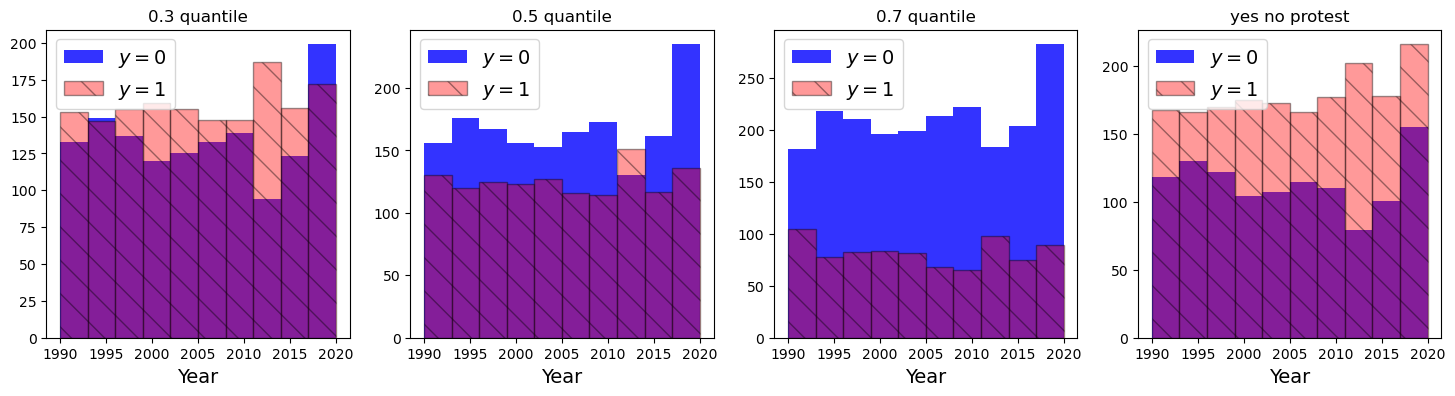

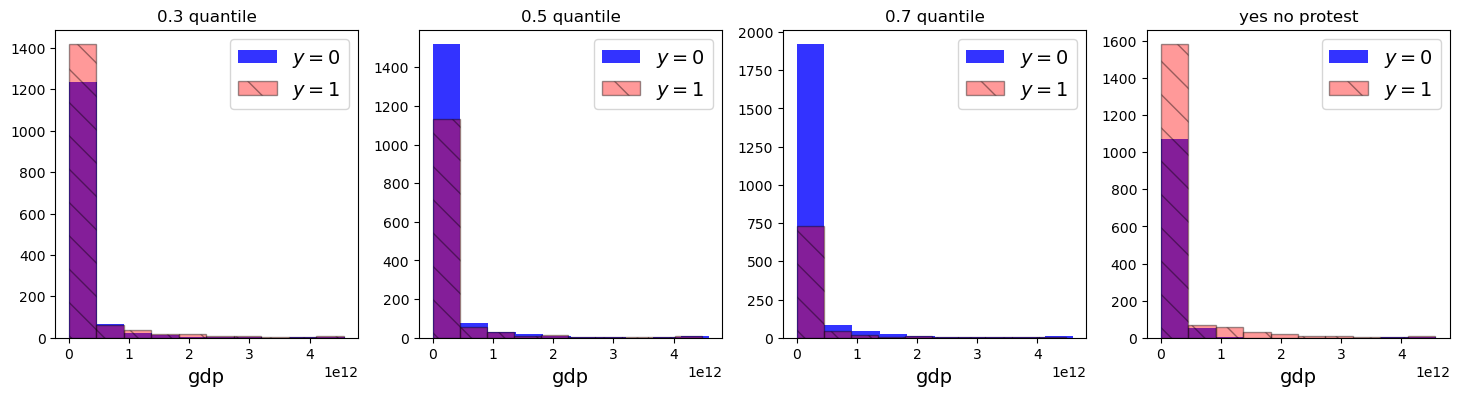

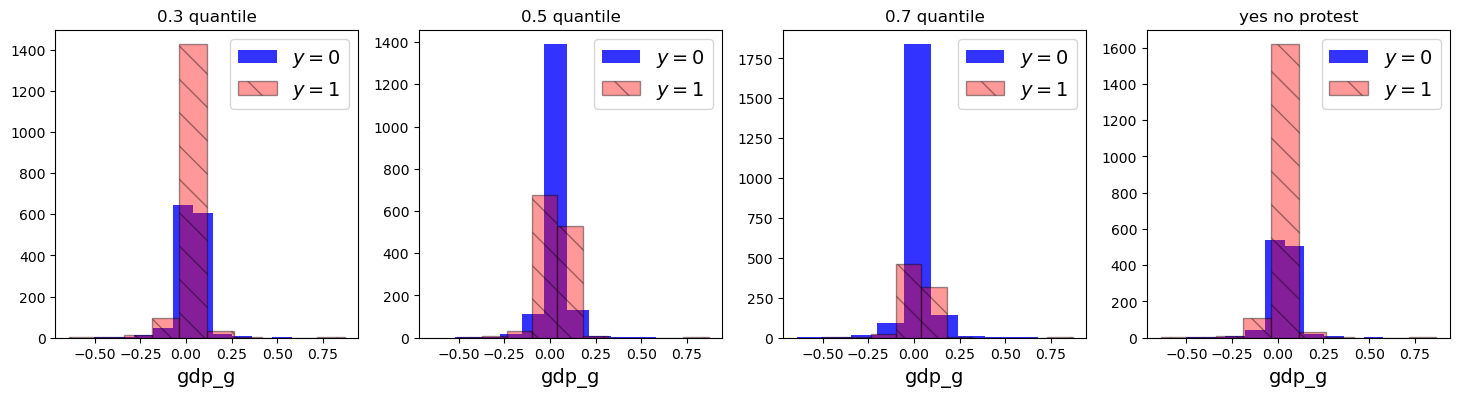

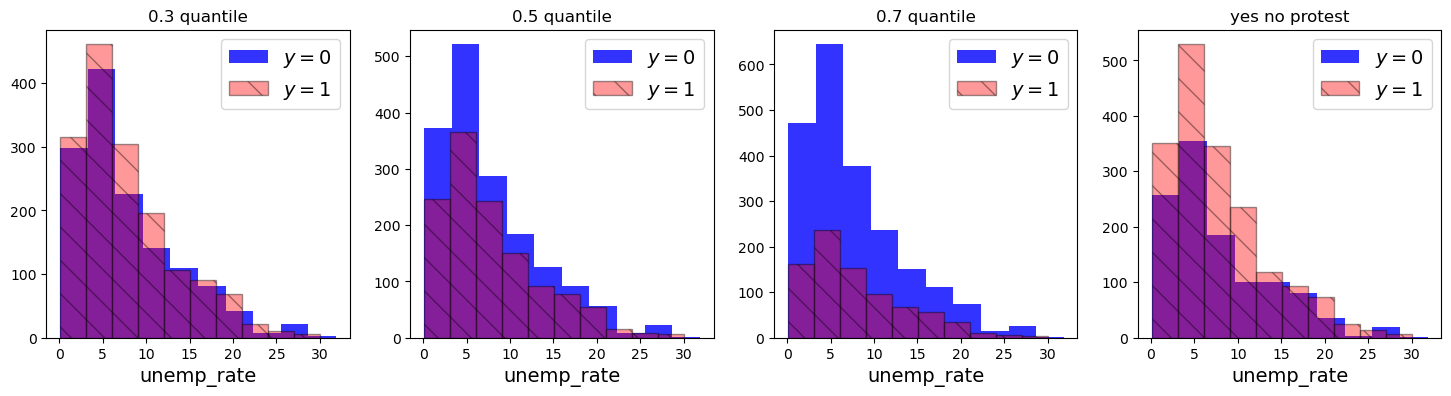

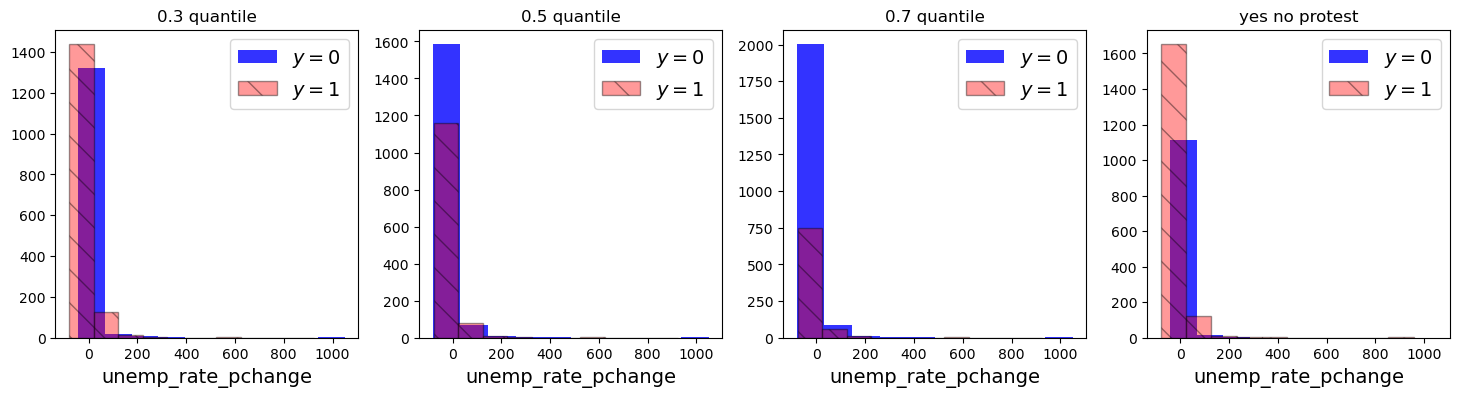

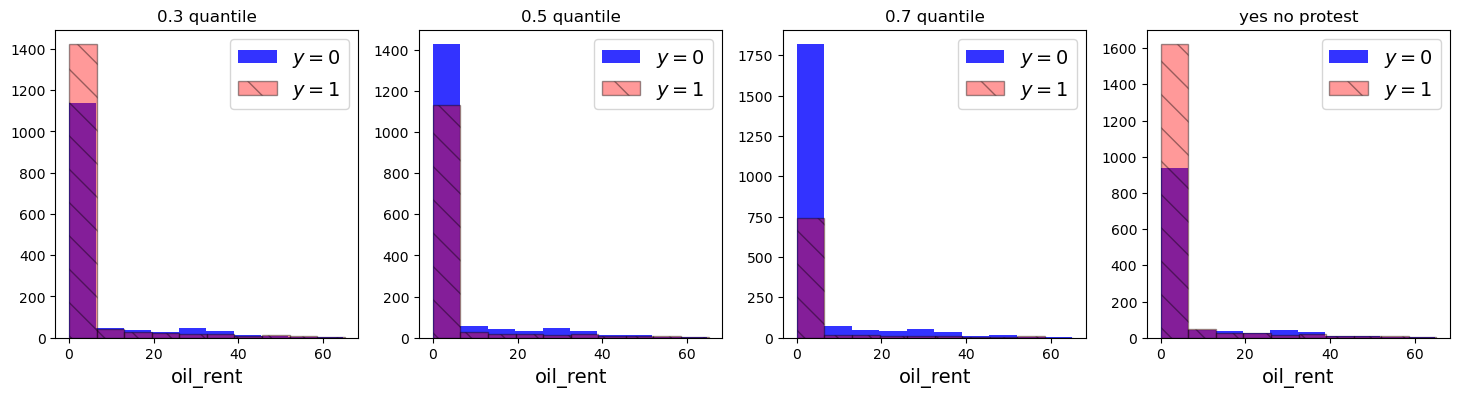

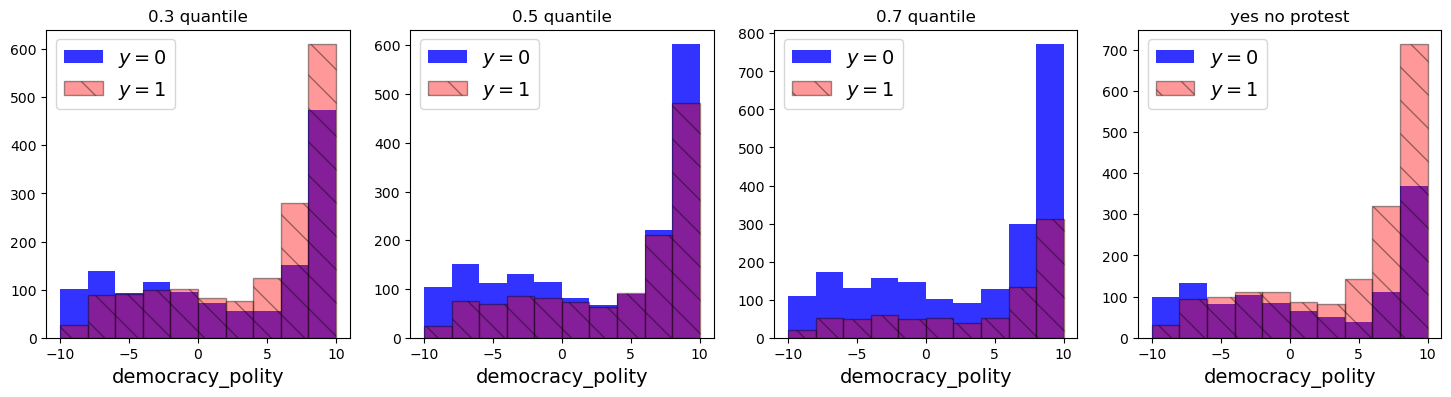

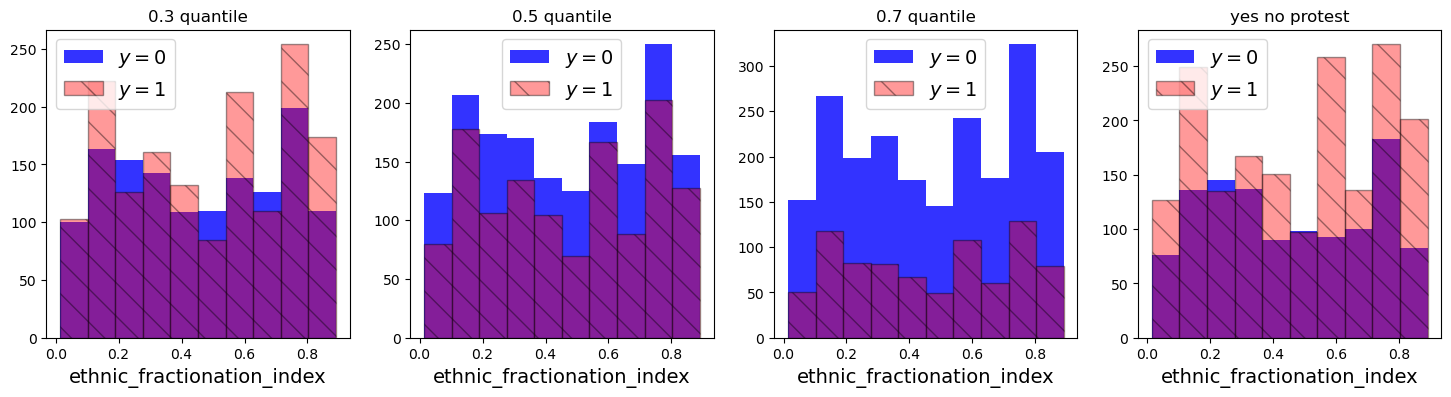

In [111]:
for col in reg_feats:
    plt.figure(figsize=(18,4))

    plt.subplot(141)
    plt.hist(train.loc[train.l_bool==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.l_bool==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")
    plt.title('0.3 quantile')
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.subplot(142)
    plt.hist(train.loc[train.m_bool==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.m_bool==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")
    plt.title('0.5 quantile')
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.subplot(143)
    plt.hist(train.loc[train.h_bool==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.h_bool==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")
    
    plt.title('0.7 quantile')
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.subplot(144)
    plt.hist(train.loc[train.yprotest==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")
    
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.hist(train.loc[train.yprotest==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")
    
    plt.title('yes no protest')
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)
    plt.show()

### Might want to focus on gdp_g, unemp_rate_pchange, and democracy_polity only; 
### the others don't seem to separate the two groups at all

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

### A note on confusion matrix: 
#### we might want to minimize false negative rate, which is given protest = 1, what's the probability we incorrectly classify it as 0
#### or could maximize recall, which is from all data points = 1, how much did we get correct

In [194]:
# create stratified kfolds for cross validation
n_splits = 5

stratkfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=216)

In [195]:
sub_feats = ['gdp_g', 'unemp_rate_pchange', 'democracy_polity']

In [196]:
# with logistic regression, see if using just a subset of features can have better scores than all the scores
# test with yprotest

log_reg_accs = np.zeros((n_splits, len(sub_feats)))
log_reg_recall= np.zeros((n_splits, len(sub_feats)))
log_reg_fnr = np.zeros((n_splits, len(sub_feats)))

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    j = 0
    for feature in sub_feats:
        log_reg = LogisticRegression(penalty=None)
        
        log_reg.fit(df_tt[feature].values.reshape(-1,1),
                       df_tt.yprotest.values)
        
        pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(df_ho.yprotest.values,
                                              pred)
        log_reg_recall[i,j] = np.round(recall_score(df_ho.yprotest.values,
                                              pred),4)
        # grab confusion matrix values
        FN = confusion_matrix(df_ho.yprotest.values, pred)[1,0]
        TP = confusion_matrix(df_ho.yprotest.values, pred)[1,1]
        log_reg_fnr[i,j] = np.round(FN/(TP+FN),4)
        
        j = j + 1
    i = i + 1

In [197]:
print('accuracy score:', np.mean(log_reg_accs, axis = 0), 'recall score', np.mean(log_reg_recall, axis = 0), 'false negative rate: ', np.mean(log_reg_fnr, axis=0)) 

accuracy score: [0.61050462 0.61016449 0.64255979] recall score [0.99776 0.99832 0.85928] false negative rate:  [0.00224 0.00168 0.14072]


In [198]:
# see if metrics improve by including all 3 in the model. We can also test later if including all of the reg_feats can add value

sub_log_accs = np.zeros(n_splits)
sub_log_recall = np.zeros(n_splits)
sub_log_fnr = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[sub_feats].values,
                   df_tt.yprotest.values)
        
    pred = log_reg.predict(df_ho[sub_feats].values)
    
    sub_log_accs[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    sub_log_recall[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    # grab confusion matrix values
    FN = confusion_matrix(df_ho.yprotest.values, pred)[1,0]
    TP = confusion_matrix(df_ho.yprotest.values, pred)[1,1]
    sub_log_fnr[i] = np.round(FN/(TP+FN),4)
    
    i = i + 1

In [199]:
print('accuracy: ', np.mean(sub_log_accs), 'recall score: ', np.mean(sub_log_recall), 'false negative rate: ', np.mean(sub_log_fnr))

accuracy:  0.6452913233832003 recall score:  0.6452913233832003 false negative rate:  0.13457999999999998


In [200]:
# see if accuracy/recall gets better by including all features

full_log_accs = np.zeros(n_splits)
full_log_recall = np.zeros(n_splits)
full_log_fnr = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[reg_feats].values,
                   df_tt.yprotest.values)
        
    pred = log_reg.predict(df_ho[reg_feats].values)
    
    full_log_accs[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    full_log_recall[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    # grab confusion matrix values
    FN = confusion_matrix(df_ho.yprotest.values, pred)[1,0]
    TP = confusion_matrix(df_ho.yprotest.values, pred)[1,1]
    full_log_fnr[i] = np.round(FN/(TP+FN),4)
    
    i = i + 1

In [201]:
print('accuracy: ', np.mean(full_log_accs), 'recall score: ', np.mean(full_log_recall), 'false negative rate: ', np.mean(full_log_fnr))

accuracy:  0.6108459163560884 recall score:  0.6108459163560884 false negative rate:  0.0


### full model is not performing better than just the model with single variables. 
#### False negative rate = 0 may indicate that none of the predictions were of class 0

In [202]:
# for sanity check, see if any of the models above fare better than just random in terms of metrics
random_accs = []
recall = []
fnr =[]

for i in range(1000):
    draw = np.random.binomial(n=1,
                                 p=train.yprotest.sum()/len(train),
                                 size=len(train))
    
    random_accs.append(accuracy_score(train.yprotest.values, draw))
    recall.append(accuracy_score(train.yprotest.values, draw))
    FN = confusion_matrix(train.yprotest.values, draw)[1,0]
    TP = confusion_matrix(train.yprotest.values, draw)[1,1]
    fnr.append(np.round(FN/(TP+FN),4))

print(np.mean(random_accs), np.mean(recall), np.mean(fnr))

0.524706684856753 0.524706684856753 0.3888756


### Check the different types of targets

In [203]:
sub_feats

['gdp_g', 'unemp_rate_pchange', 'democracy_polity']

In [204]:
# create a loop to run single variable logistic regressions for the different protest thresholds
accs_l = []
recall_l = []
fnr_l = []

for protest in protest_b:
    accs = np.zeros((n_splits, len(sub_feats)))
    recall= np.zeros((n_splits, len(sub_feats)))
    fnr = np.zeros((n_splits, len(sub_feats)))

    i = 0
    for train_index, test_index in stratkfold.split(train, train[protest]):
        df_tt = train.iloc[train_index]
        df_ho = train.iloc[test_index]
        
        j = 0
        for feature in sub_feats:
            log_reg = LogisticRegression(penalty=None)
            
            log_reg.fit(df_tt[feature].values.reshape(-1,1),
                        df_tt[protest].values)
            
            pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
            
            accs[i,j] = accuracy_score(df_ho[protest].values, pred)
            recall[i,j] = np.round(recall_score(df_ho[protest].values, pred),4)
            # grab confusion matrix values
            FN = confusion_matrix(df_ho[protest].values, pred)[1,0]
            TP = confusion_matrix(df_ho[protest].values, pred)[1,1]
            fnr[i,j] = np.round(FN/(TP+FN),4)
            
            j = j + 1
        i = i + 1
    
    accs_l.append(np.mean(accs, axis=0))
    recall_l.append(np.mean(recall, axis=0))
    fnr_l.append(np.mean(fnr, axis=0))

print(accs_l)
print(recall_l)
print(fnr_l)

[array([0.53922356, 0.53854213, 0.5845771 ]), array([0.56855301, 0.57025891, 0.57060021]), array([0.71862249, 0.71862249, 0.7189632 ]), array([0.61050462, 0.61016449, 0.64255979])]
[array([0.9924, 0.9905, 0.7367]), array([0.00396, 0.     , 0.     ]), array([0.00242, 0.00122, 0.     ]), array([0.99776, 0.99832, 0.85928])]
[array([0.0076, 0.0095, 0.2633]), array([0.99604, 1.     , 1.     ]), array([0.99758, 0.99878, 1.     ]), array([0.00224, 0.00168, 0.14072])]


In [205]:
l_bool = pd.DataFrame({'gdp_g':[accs_l[0][0], recall_l[0][0], fnr_l[0][0]],
                       'unemp_rate_pchange':[accs_l[0][1], recall_l[0][1], fnr_l[0][1]],
                       'democracy':[accs_l[0][2], recall_l[0][2], fnr_l[0][2]],
                       'protest_outcome':['l_bool']*3},
                       index = ['accuracy', 'recall', 'FNR'])
m_bool = pd.DataFrame({'gdp_g':[accs_l[1][0], recall_l[1][0], fnr_l[1][0]],
                       'unemp_rate_pchange':[accs_l[1][1], recall_l[1][1], fnr_l[1][1]],
                       'democracy':[accs_l[1][2], recall_l[1][2], fnr_l[1][2]],
                       'protest_outcome':['m_bool']*3},
                       index = ['accuracy', 'recall', 'FNR'])
h_bool = pd.DataFrame({'gdp_g':[accs_l[2][0], recall_l[2][0], fnr_l[2][0]],
                       'unemp_rate_pchange':[accs_l[2][1], recall_l[2][1], fnr_l[2][1]],
                       'democracy':[accs_l[2][2], recall_l[2][2], fnr_l[2][2]],
                       'protest_outcome':['h_bool']*3},
                       index = ['accuracy', 'recall', 'FNR'])
ypro = pd.DataFrame({'gdp_g':[accs_l[3][0], recall_l[3][0], fnr_l[3][0]],
                       'unemp_rate_pchange':[accs_l[3][1], recall_l[3][1], fnr_l[3][1]],
                       'democracy':[accs_l[3][2], recall_l[3][2], fnr_l[3][2]],
                       'protest_outcome':['yprotest']*3},
                       index = ['accuracy', 'recall', 'FNR'])

In [206]:
outcome = pd.concat([l_bool, m_bool, h_bool, ypro])

In [207]:
# add to the outcome df metrics from all 3 features for the different types of threshold
sub_accs=[]
sub_recall=[]
sub_fnr=[]

for protest in protest_b:
    sub_log_accs = np.zeros(n_splits)
    sub_log_recall = np.zeros(n_splits)
    sub_log_fnr = np.zeros(n_splits)

    i = 0
    for train_index, test_index in stratkfold.split(train, train[protest]):
        df_tt = train.iloc[train_index]
        df_ho = train.iloc[test_index]
        
        log_reg = LogisticRegression(penalty=None,
                                        max_iter = 1000)
            
        log_reg.fit(df_tt[sub_feats].values,
                    df_tt[protest].values)
            
        pred = log_reg.predict(df_ho[sub_feats].values)
        
        sub_log_accs[i] = accuracy_score(df_ho[protest].values,
                                                pred)
        sub_log_recall[i] = accuracy_score(df_ho[protest].values,
                                                pred)
        # grab confusion matrix values
        FN = confusion_matrix(df_ho[protest].values, pred)[1,0]
        TP = confusion_matrix(df_ho[protest].values, pred)[1,1]
        sub_log_fnr[i] = np.round(FN/(TP+FN),4)
        
        i = i + 1
    sub_accs.append(np.mean(sub_log_accs))
    sub_recall.append(np.mean(sub_log_recall))
    sub_fnr.append(np.mean(sub_log_fnr))

print(sub_accs)
print(sub_recall)
print(sub_fnr)

[0.5828746853033009, 0.5688931397573129, 0.7186219046345449, 0.6452913233832003]
[0.5828746853033009, 0.5688931397573129, 0.7186219046345449, 0.6452913233832003]
[0.2652, 0.99286, 0.99878, 0.13457999999999998]


In [208]:
protest_b

['l_bool', 'm_bool', 'h_bool', 'yprotest']

In [209]:
sub_models = pd.DataFrame()
for i in range(4):
    df = pd.DataFrame({'sub_feats': [sub_accs[i], sub_recall[i], sub_fnr[i]],
                       'protest_outcome': [protest_b[i]]*3}, index= ['accuracy', 'recall', 'FNR'])
    sub_models = pd.concat([sub_models, df])

In [219]:
outcome, sub_models

(             gdp_g  unemp_rate_pchange  democracy protest_outcome
 accuracy  0.539224            0.538542   0.584577          l_bool
 recall    0.992400            0.990500   0.736700          l_bool
 FNR       0.007600            0.009500   0.263300          l_bool
 accuracy  0.568553            0.570259   0.570600          m_bool
 recall    0.003960            0.000000   0.000000          m_bool
 FNR       0.996040            1.000000   1.000000          m_bool
 accuracy  0.718622            0.718622   0.718963          h_bool
 recall    0.002420            0.001220   0.000000          h_bool
 FNR       0.997580            0.998780   1.000000          h_bool
 accuracy  0.610505            0.610164   0.642560        yprotest
 recall    0.997760            0.998320   0.859280        yprotest
 FNR       0.002240            0.001680   0.140720        yprotest,
           sub_feats protest_outcome
 accuracy   0.582875          l_bool
 recall     0.582875          l_bool
 FNR        0.265

### Conclusion, the yprotest is best when it comes to recall and FNR across the three single variables. 
### can try other models i.e., KNN Classifier, Random Forest

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
# Make the knn pipe
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn',KNeighborsClassifier(n_neighbors = 5))])

# try the simple case of just one train set
# Fit the model object
knn_pipe.fit(train[sub_feats], train['yprotest'])

# get the predictions
y_train_pred = knn_pipe.predict(train[sub_feats])
acc = accuracy_score(train['yprotest'].values, y_train_pred)
recall = recall_score(train['yprotest'].values, y_train_pred)

print(np.mean(y_train_pred), acc, recall)

0.6916780354706685 0.7315825375170532 0.8464544946957008


In [213]:
train.yprotest.value_counts(normalize=True)

yprotest
1.0    0.610846
0.0    0.389154
Name: proportion, dtype: float64

In [214]:
# try repeating on stratified kfold
knn_accs = np.zeros(n_splits)
knn_recall = np.zeros(n_splits)
knn_fnr = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    knn_pipe = Pipeline([('scale', StandardScaler()), ('knn',KNeighborsClassifier(n_neighbors = 5))])

    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
        
    knn_pipe.fit(df_tt[sub_feats].values,
                   df_tt.yprotest.values)
        
    pred = knn_pipe.predict(df_ho[sub_feats].values)
    
    knn_accs[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    knn_recall[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    # grab confusion matrix values
    FN = confusion_matrix(df_ho.yprotest.values, pred)[1,0]
    TP = confusion_matrix(df_ho.yprotest.values, pred)[1,1]
    knn_fnr[i] = np.round(FN/(TP+FN),4)
    
    i = i + 1

In [215]:
print(np.mean(knn_accs), np.mean(knn_recall), np.mean(knn_fnr))

0.6098255141257392 0.6098255141257392 0.25294


### knn did not perform better than the combined logistic

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# try random forest

grid_cv_c = GridSearchCV(RandomForestClassifier(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv_c.fit(train[sub_feats], train['yprotest'])

print(grid_cv_c.best_params_, grid_cv_c.best_score_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [225]:
feature_importance_df = pd.DataFrame({
    'Feature': sub_feats,  # List of feature names
    'Importance': grid_cv_c.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

              Feature  Importance
0    democracy_polity    0.411393
1               gdp_g    0.300956
2  unemp_rate_pchange    0.287652


In [ ]:
#create rf model based on above parameters

rf = RandomForestClassifier(
    n_estimators = 500, # number of trees in ensemble
    max_depth = 8, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 2, # default is round(sqrt(num_features)), which in this case is 1.
    bootstrap= True, # sampling with replacement
    max_samples = 500, # number of training samples selected with replacement to build tree
    random_state = 216 # for consistency
    )

rf.fit(train[sub_feats], train['yprotest'])

RandomForestClassifier(max_depth=8, max_features=2, max_samples=500,
                       min_samples_leaf=5, n_estimators=500, random_state=216)

In [238]:
rf_acc = accuracy_score(train['yprotest'].values, rf.predict(train[sub_feats]))
rf_recall = recall_score(train['yprotest'].values, rf.predict(train[sub_feats]))
FN = confusion_matrix(train['yprotest'].values, rf.predict(train[sub_feats]))[1,0]
TP = confusion_matrix(train['yprotest'].values, rf.predict(train[sub_feats]))[1,1]
rf_fnr = np.round(FN/(TP+FN),4)

print(rf_acc, rf_recall, rf_fnr)

# not too bad of results from random forest classifier

0.7066848567530696 0.9089893914014517 0.091


In [ ]:
# final check: random forest classifier with all possible features

grid_cv_all = GridSearchCV(RandomForestClassifier(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv_all.fit(train[reg_feats], train['yprotest'])

print(grid_cv_all.best_params_, grid_cv_all.best_score_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [235]:
feature_importance_df = pd.DataFrame({
    'Feature': reg_feats,  # List of feature names
    'Importance': grid_cv_all.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                      Feature  Importance
0                         gdp    0.182720
1            democracy_polity    0.155586
2  ethnic_fractionation_index    0.129066
3                  unemp_rate    0.125746
4                    oil_rent    0.114512
5                       gdp_g    0.105369
6          unemp_rate_pchange    0.095187
7                        Year    0.091816


In [ ]:
#rf model for all possible features

rf_all = RandomForestClassifier(
    n_estimators = 500, # number of trees in ensemble
    max_depth = 10, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 3, # default is round(sqrt(num_features)), which in this case is 1.
    bootstrap= True, # sampling with replacement
    max_samples = 500, # number of training samples selected with replacement to build tree
    random_state = 216 # for consistency
    )

rf_all.fit(train[reg_feats], train['yprotest'])

RandomForestClassifier(max_depth=10, max_features=3, max_samples=500,
                       min_samples_leaf=5, n_estimators=500, random_state=216)

In [ ]:
rf_all_acc = accuracy_score(train['yprotest'].values, rf_all.predict(train[reg_feats]))
rf_all_recall = recall_score(train['yprotest'].values, rf_all.predict(train[reg_feats]))
FN = confusion_matrix(train['yprotest'].values, rf_all.predict(train[reg_feats]))[1,0]
TP = confusion_matrix(train['yprotest'].values, rf_all.predict(train[reg_feats]))[1,1]
rf_all_fnr = np.round(FN/(TP+FN),4)

print(rf_all_acc, rf_all_recall, rf_all_fnr)

# slightly better accuracy, but slightly worse for all others
# would opt for simpler model

0.7677353342428377 0.9045226130653267 0.0955


### Could consider the random forest classifier model with just 3 features